In [1]:
import time

import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import TimeSeriesSplit
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, log_loss, brier_score_loss

import warnings
warnings.filterwarnings('ignore')

In [2]:
flights = pd.read_csv('flights.csv')
print("\nFirst 5 rows of the dataset:")
flights.head()


First 5 rows of the dataset:


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
print("Column names:")
display(flights.columns)

print("Data types:")
flights.dtypes

Column names:


Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

Data types:


YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
TAIL_NUMBER             object
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
TAXI_OUT               float64
WHEELS_OFF             float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
AIR_TIME               float64
DISTANCE                 int64
WHEELS_ON              float64
TAXI_IN                float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
ARRIVAL_DELAY          float64
DIVERTED                 int64
CANCELLED                int64
CANCELLATION_REASON     object
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
dtype: object

In [4]:
print("\nMissing values analysis")
missing_values = flights.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_values / len(flights) * 100).round(2)
missing_clean_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_pct})
missing_clean_data = missing_clean_data[missing_clean_data['Missing Values'] > 0]
missing_clean_data


Missing values analysis


,Missing Values,Percentage (%)
CANCELLATION_REASON,5729195,98.46
WEATHER_DELAY,4755640,81.72
LATE_AIRCRAFT_DELAY,4755640,81.72
AIRLINE_DELAY,4755640,81.72
SECURITY_DELAY,4755640,81.72
AIR_SYSTEM_DELAY,4755640,81.72
AIR_TIME,105071,1.81
ARRIVAL_DELAY,105071,1.81
ELAPSED_TIME,105071,1.81
WHEELS_ON,92513,1.59


In [5]:
flights.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
YEAR,5819079.0,2015.000000,0.000000,2015.0,2015.0,2015.0,2015.0,2015.0
MONTH,5819079.0,6.524085,3.405137,1.0,4.0,7.0,9.0,12.0
DAY,5819079.0,15.704594,8.783425,1.0,8.0,16.0,23.0,31.0
DAY_OF_WEEK,5819079.0,3.926941,1.988845,1.0,2.0,4.0,6.0,7.0
FLIGHT_NUMBER,5819079.0,2173.092742,1757.063999,1.0,730.0,1690.0,3230.0,9855.0
SCHEDULED_DEPARTURE,5819079.0,1329.602470,483.751821,1.0,917.0,1325.0,1730.0,2359.0
DEPARTURE_TIME,5732926.0,1335.204439,496.423260,1.0,921.0,1330.0,1740.0,2400.0
DEPARTURE_DELAY,5732926.0,9.370158,37.080942,-82.0,-5.0,-2.0,7.0,1988.0
TAXI_OUT,5730032.0,16.071662,8.895574,1.0,11.0,14.0,19.0,225.0
WHEELS_OFF,5730032.0,1357.170841,498.009356,1.0,935.0,1343.0,1754.0,2400.0


We add a column (DELAYED) that shows if DEPARTURE_DELAY is more than 15 min

we add a column (TARGET) that shows if the flight is delayed more than 15 min or cancelled

In [6]:
flights['DELAYED'] = (flights['DEPARTURE_DELAY'] > 15).astype(int)
# Combined target: 1 if delayed or cancelled, 0 otherwise
flights['TARGET'] = ((flights['DELAYED'] == 1) | (flights['CANCELLED'] == 1)).astype(int)

In [7]:
flights['TARGET'].value_counts()

0    4712659
1    1106420
Name: TARGET, dtype: int64

Now we start analysing realtions between DEPARTURE_DELAY and some columns:

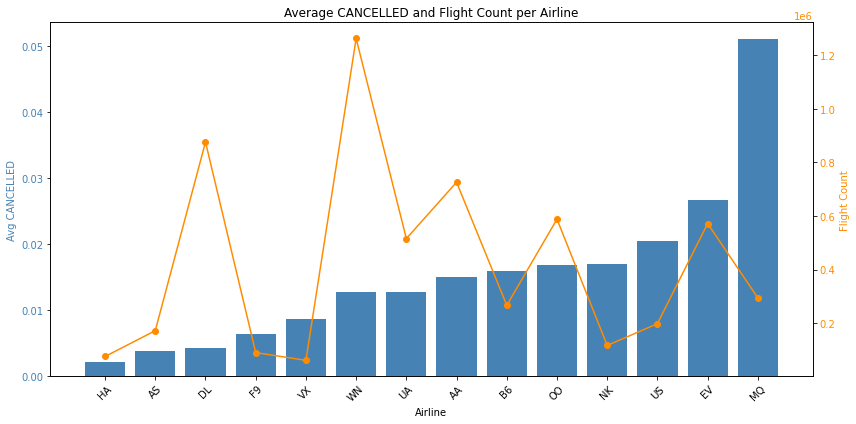

In [8]:
grouped = flights.groupby('AIRLINE').agg({
    'CANCELLED': 'mean',
    'FLIGHT_NUMBER': 'count'
}).rename(columns={
    'CANCELLED': 'Avg CANCELLED',
    'FLIGHT_NUMBER': 'Flight Count'
}).sort_values('Avg CANCELLED')

fig, ax1 = plt.subplots(figsize=(12, 6))
airlines = grouped.index
x = range(len(airlines))

ax1.bar(x, grouped['Avg CANCELLED'], color='steelblue', label='Avg CANCELLED')
ax1.set_ylabel('Avg CANCELLED', color='steelblue')
ax1.set_xlabel('Airline')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x)
ax1.set_xticklabels(airlines, rotation=45)

ax2 = ax1.twinx()
ax2.plot(x, grouped['Flight Count'], color='darkorange', marker='o', label='Flight Count')
ax2.set_ylabel('Flight Count', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')

plt.title('Average CANCELLED and Flight Count per Airline')
fig.tight_layout()
plt.show()


This bar chart shows some Airlines have more cancellation than others.

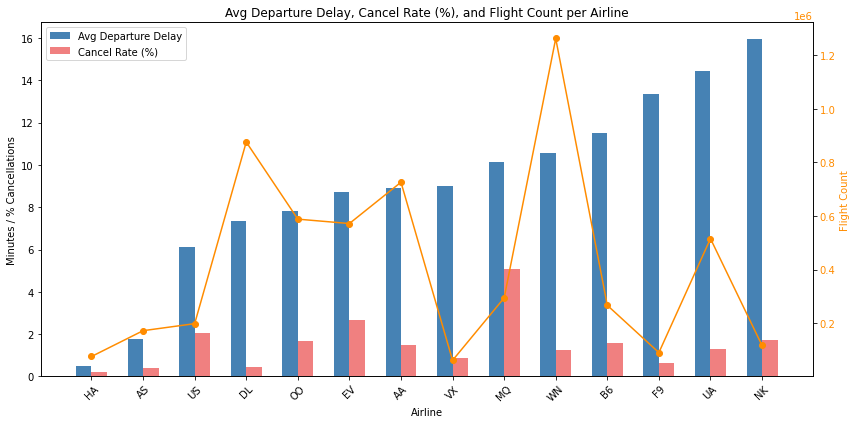

In [9]:

grouped = flights.groupby('AIRLINE').agg({
    'DEPARTURE_DELAY': 'mean',
    'FLIGHT_NUMBER': 'count',
    'CANCELLED': 'mean'
}).rename(columns={
    'DEPARTURE_DELAY': 'Avg Departure Delay',
    'FLIGHT_NUMBER': 'Flight Count',
    'CANCELLED': 'Cancel Rate'
})

grouped['Cancel Rate (%)'] = grouped['Cancel Rate'] * 100
grouped = grouped.sort_values('Avg Departure Delay')

airlines = grouped.index
x = range(len(airlines))

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar chart for Avg Departure Delay
ax1.bar(x, grouped['Avg Departure Delay'], width=0.3, label='Avg Departure Delay', align='center', color='steelblue')
# Bar chart for Cancel Rate (%)
ax1.bar([i + 0.3 for i in x], grouped['Cancel Rate (%)'], width=0.3, label='Cancel Rate (%)', align='center', color='lightcoral')

ax1.set_ylabel('Minutes / % Cancellations')
ax1.set_xlabel('Airline')
ax1.set_xticks([i + 0.15 for i in x])
ax1.set_xticklabels(airlines, rotation=45)
ax1.legend(loc='upper left')

ax2 = ax1.twinx()
ax2.plot([i + 0.15 for i in x], grouped['Flight Count'], color='darkorange', marker='o', label='Flight Count')
ax2.set_ylabel('Flight Count', color='darkorange')
ax2.tick_params(axis='y', labelcolor='darkorange')
plt.title('Avg Departure Delay, Cancel Rate (%), and Flight Count per Airline')
fig.tight_layout()
plt.show()


This bar chart shows that airline has some effect on departure delay.

also some Airlines have more cancellation than others.

airlines with more cancellation are not the same as the airlines with more departure delay

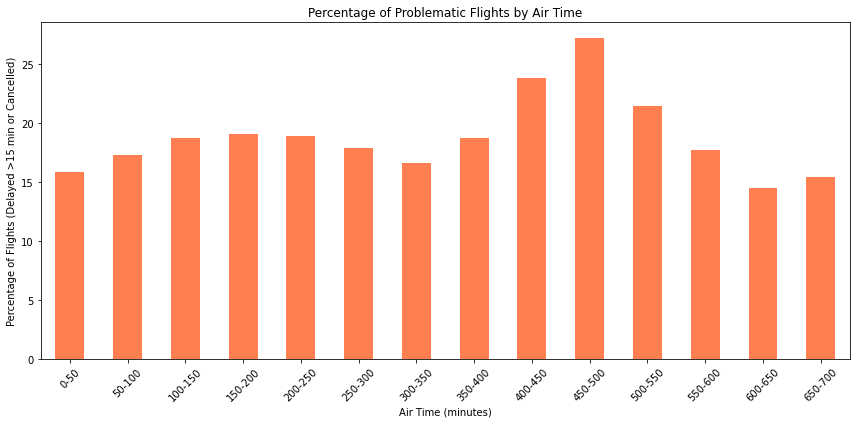

In [10]:

flights_valid = flights[flights['AIR_TIME'].notna()].copy()

bins = range(0, int(flights_valid['AIR_TIME'].max()) + 50, 50)
labels = [f'{b}-{b+50}' for b in bins[:-1]]
flights_valid['AIR_TIME_BIN'] = pd.cut(flights_valid['AIR_TIME'], bins=bins, labels=labels, include_lowest=True)

total_by_bin = flights_valid['AIR_TIME_BIN'].value_counts().sort_index()

condition = (flights_valid['DEPARTURE_DELAY'] > 15) | (flights_valid['CANCELLED'] == 1)
delayed_or_cancelled = flights_valid[condition]
count_condition_by_bin = delayed_or_cancelled['AIR_TIME_BIN'].value_counts().sort_index()

percent_by_bin = (count_condition_by_bin / total_by_bin * 100).fillna(0)

plt.figure(figsize=(12, 6))
percent_by_bin.plot(kind='bar', color='coral')
plt.xlabel('Air Time (minutes)')
plt.ylabel('Percentage of Flights (Delayed >15 min or Cancelled)')
plt.title('Percentage of Problematic Flights by Air Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


It seems not very relevant and it is better to delete it.

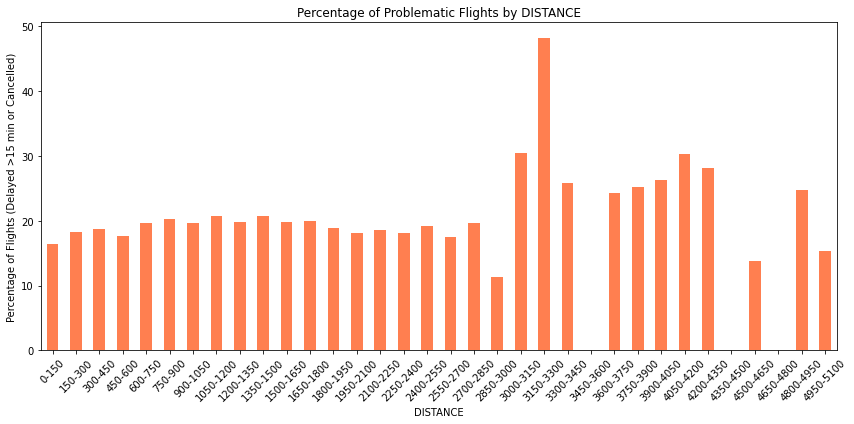

In [11]:

bins = range(0, int(flights['DISTANCE'].max()) + 150, 150)
labels = [f'{b}-{b+150}' for b in bins[:-1]]
flights['AIR_TIME_BIN'] = pd.cut(flights['DISTANCE'], bins=bins, labels=labels, include_lowest=True)

total_by_bin = flights['AIR_TIME_BIN'].value_counts().sort_index()

condition = (flights['DEPARTURE_DELAY'] > 15) | (flights['CANCELLED'] == 1)
delayed_or_cancelled = flights[condition]
count_condition_by_bin = delayed_or_cancelled['AIR_TIME_BIN'].value_counts().sort_index()

percent_by_bin = (count_condition_by_bin / total_by_bin * 100).fillna(0)

plt.figure(figsize=(12, 6))
percent_by_bin.plot(kind='bar', color='coral')
plt.xlabel('DISTANCE')
plt.ylabel('Percentage of Flights (Delayed >15 min or Cancelled)')
plt.title('Percentage of Problematic Flights by DISTANCE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [12]:
print(f"Number of unique origin airports: {flights['ORIGIN_AIRPORT'].nunique()}")
print(f"Number of unique destination airports: {flights['DESTINATION_AIRPORT'].nunique()}")


Number of unique origin airports: 930
Number of unique destination airports: 930


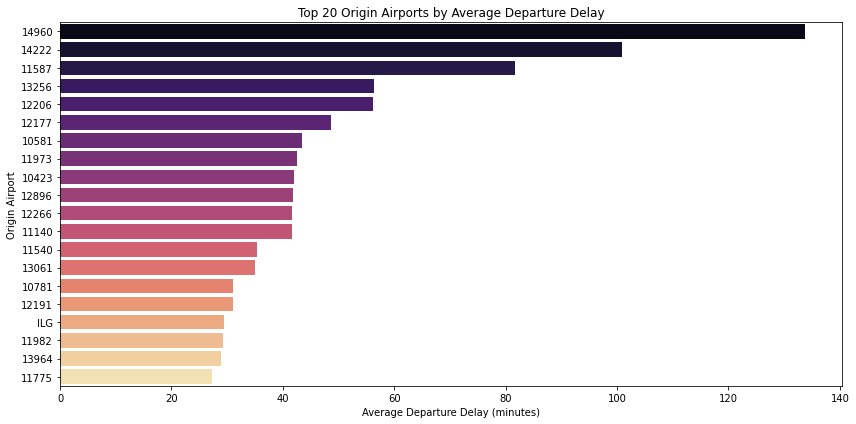

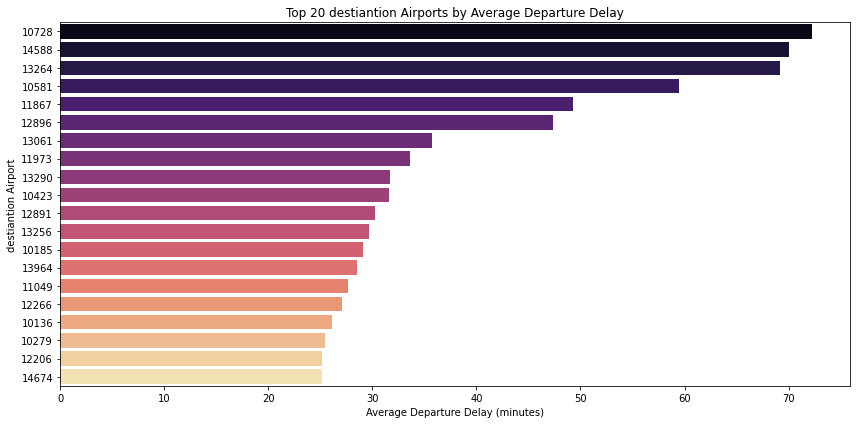

In [13]:

airport_delay = flights.groupby('ORIGIN_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=airport_delay.values, y=airport_delay.index, palette='magma')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Origin Airport')
plt.title('Top 20 Origin Airports by Average Departure Delay')
plt.tight_layout()
plt.show()

airport2_delay = flights.groupby('DESTINATION_AIRPORT')['DEPARTURE_DELAY'].mean().sort_values(ascending=False).head(20)

plt.figure(figsize=(12,6))
sns.barplot(x=airport2_delay.values, y=airport2_delay.index, palette='magma')
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('destiantion Airport')
plt.title('Top 20 destiantion Airports by Average Departure Delay')
plt.tight_layout()
plt.show()


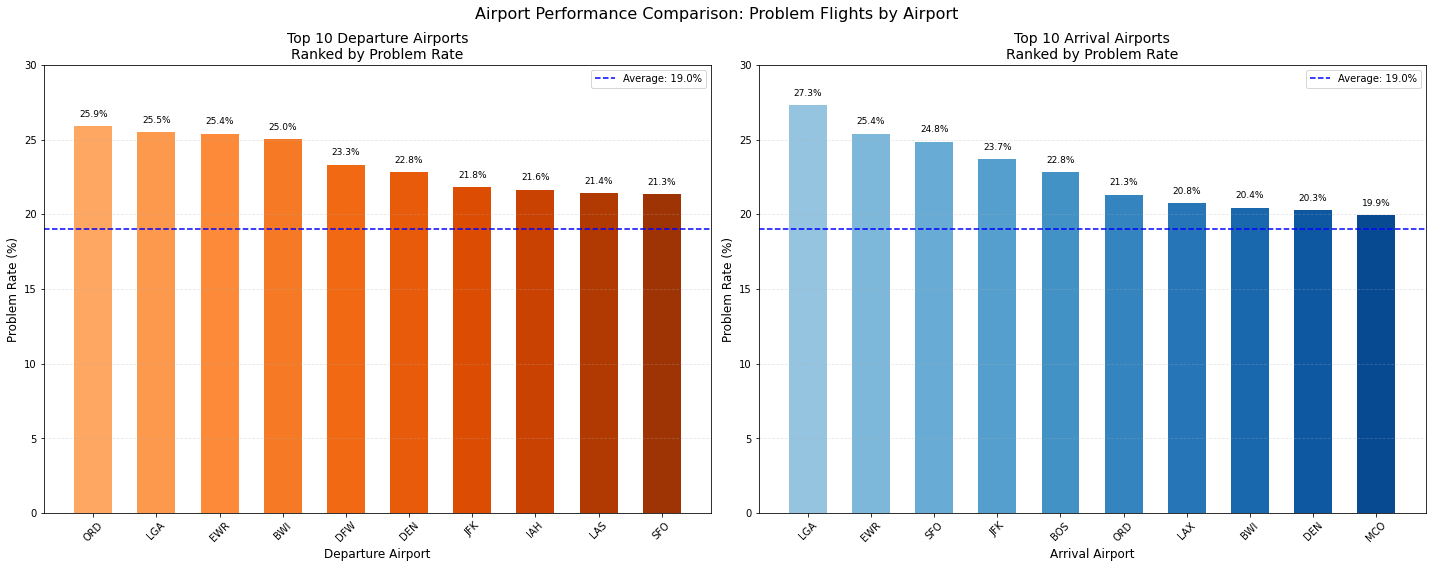

In [14]:
busy_origin_airports = flights['ORIGIN_AIRPORT'].value_counts().head(20).index
origin_stats = flights[flights['ORIGIN_AIRPORT'].isin(busy_origin_airports)].groupby('ORIGIN_AIRPORT').agg({
    'TARGET': ['count', 'mean'],
    'ARRIVAL_DELAY': ['mean']
})
origin_stats.columns = ['Total_Flights', 'Problem_Rate', 'Avg_Delay_Min']
origin_stats['Problem_Rate'] = origin_stats['Problem_Rate'] * 100 
origin_stats = origin_stats.sort_values('Problem_Rate', ascending=False)

busy_destinations = flights['DESTINATION_AIRPORT'].value_counts().head(20).index
destination_stats = flights[flights['DESTINATION_AIRPORT'].isin(busy_destinations)].groupby('DESTINATION_AIRPORT').agg({
    'TARGET': ['count', 'mean'],
    'ARRIVAL_DELAY': ['mean']
})
destination_stats.columns = ['Total_Flights', 'Problem_Rate', 'Avg_Delay_Min']
destination_stats['Problem_Rate'] = destination_stats['Problem_Rate'] * 100 
destination_stats = destination_stats.sort_values('Problem_Rate', ascending=False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

top_origins = origin_stats.head(10).index
origin_rates = origin_stats['Problem_Rate'].head(10).values
origin_colors = plt.cm.Oranges(np.linspace(0.4, 0.9, len(top_origins)))

bars1 = ax1.bar(top_origins, origin_rates, color=origin_colors, width=0.6)

for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

avg_rate = flights['TARGET'].mean() * 100
ax1.axhline(y=avg_rate, color='blue', linestyle='--', 
           label=f'Average: {avg_rate:.1f}%')

ax1.set_title('Top 10 Departure Airports\nRanked by Problem Rate', fontsize=14)
ax1.set_xlabel('Departure Airport', fontsize=12)
ax1.set_ylabel('Problem Rate (%)', fontsize=12)
ax1.grid(axis='y', linestyle='--', alpha=0.3)
ax1.set_xticklabels(top_origins, rotation=45)
ax1.legend()

top_destinations = destination_stats.head(10).index
destination_rates = destination_stats['Problem_Rate'].head(10).values
destination_colors = plt.cm.Blues(np.linspace(0.4, 0.9, len(top_destinations)))

bars2 = ax2.bar(top_destinations, destination_rates, color=destination_colors, width=0.6)

for bar in bars2:
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

ax2.axhline(y=avg_rate, color='blue', linestyle='--', 
           label=f'Average: {avg_rate:.1f}%')

ax2.set_title('Top 10 Arrival Airports\nRanked by Problem Rate', fontsize=14)
ax2.set_xlabel('Arrival Airport', fontsize=12)
ax2.set_ylabel('Problem Rate (%)', fontsize=12)
ax2.grid(axis='y', linestyle='--', alpha=0.3)
ax2.set_xticklabels(top_destinations, rotation=45)
ax2.legend()

max_rate = max(origin_rates.max(), destination_rates.max())
ax1.set_ylim(0, max_rate * 1.1)
ax2.set_ylim(0, max_rate * 1.1)

plt.suptitle('Airport Performance Comparison: Problem Flights by Airport', fontsize=16, y=0.98)

plt.tight_layout()
plt.subplots_adjust(top=0.88)

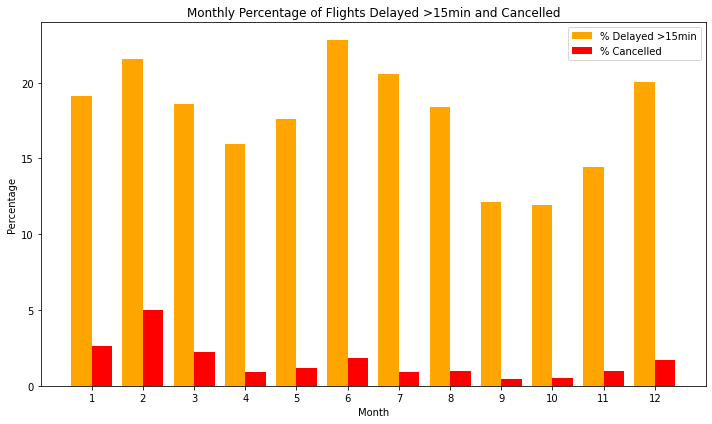

In [15]:
grouped = flights.groupby('MONTH').agg(
    total_flights=('DEPARTURE_DELAY', 'count'),
    delayed_flights=('DELAYED', 'sum'),
    cancelled_flights=('CANCELLED', 'sum')
).reset_index()

grouped['% Delayed >15min'] = 100 * grouped['delayed_flights'] / grouped['total_flights']
grouped['% Cancelled'] = 100 * grouped['cancelled_flights'] / grouped['total_flights']

plt.figure(figsize=(10, 6))
bar_width = 0.4
x = grouped['MONTH']

plt.bar(x - 0.2, grouped['% Delayed >15min'], width=bar_width, label='% Delayed >15min', color='orange')
plt.bar(x + 0.2, grouped['% Cancelled'], width=bar_width, label='% Cancelled', color='red')

plt.xlabel('Month')
plt.ylabel('Percentage')
plt.title('Monthly Percentage of Flights Delayed >15min and Cancelled')
plt.xticks(grouped['MONTH'])
plt.legend()
plt.tight_layout()
plt.show()

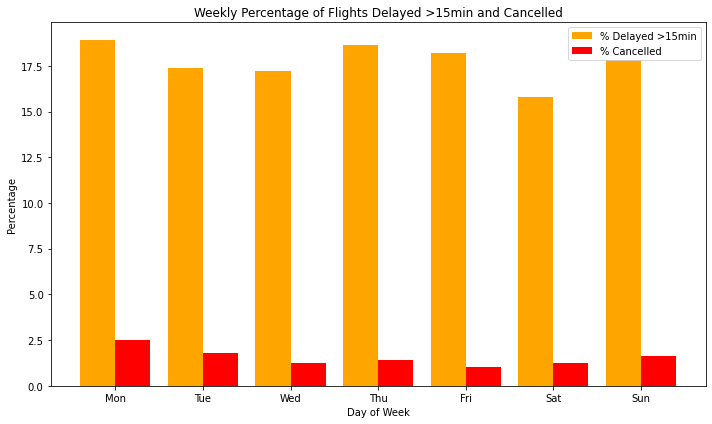

In [16]:
grouped = flights.groupby('DAY_OF_WEEK').agg(
    total_flights=('DEPARTURE_DELAY', 'count'),
    delayed_flights=('DELAYED', 'sum'),
    cancelled_flights=('CANCELLED', 'sum')
).reset_index()

grouped['% Delayed >15min'] = 100 * grouped['delayed_flights'] / grouped['total_flights']
grouped['% Cancelled'] = 100 * grouped['cancelled_flights'] / grouped['total_flights']

plt.figure(figsize=(10, 6))
bar_width = 0.4
x = grouped['DAY_OF_WEEK']

plt.bar(x - 0.2, grouped['% Delayed >15min'], width=bar_width, label='% Delayed >15min', color='orange')
plt.bar(x + 0.2, grouped['% Cancelled'], width=bar_width, label='% Cancelled', color='red')

plt.xlabel('Day of Week')
plt.ylabel('Percentage')
plt.title('Weekly Percentage of Flights Delayed >15min and Cancelled')
plt.xticks(grouped['DAY_OF_WEEK'], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.legend()
plt.tight_layout()
plt.show()

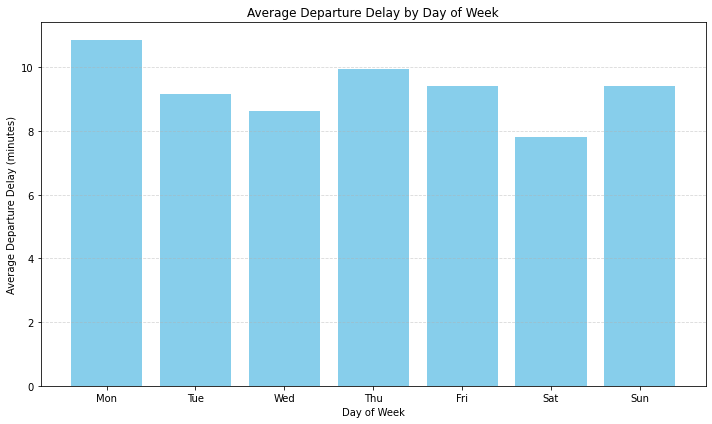

In [17]:
avg_delay_by_day = flights.groupby('DAY_OF_WEEK')['DEPARTURE_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(avg_delay_by_day['DAY_OF_WEEK'], avg_delay_by_day['DEPARTURE_DELAY'], color='skyblue')

plt.xlabel('Day of Week')
plt.ylabel('Average Departure Delay (minutes)')
plt.title('Average Departure Delay by Day of Week')
plt.xticks(avg_delay_by_day['DAY_OF_WEEK'], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

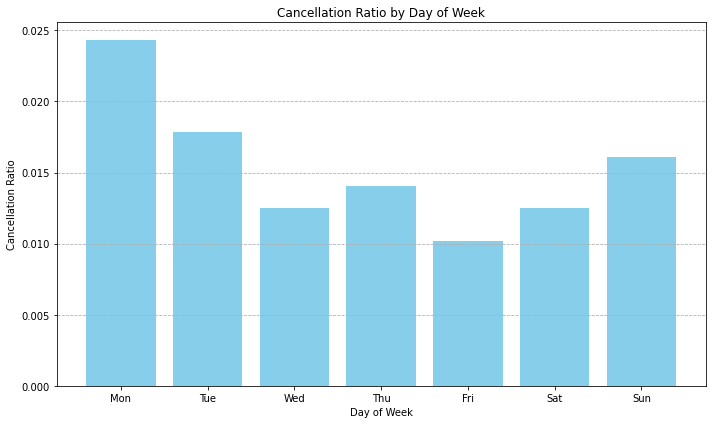

In [18]:
cancelled_ratio_by_day_of_week = flights.groupby('DAY_OF_WEEK').agg(
    cancelled_count=('CANCELLED', 'sum'),
    flight_count=('SCHEDULED_DEPARTURE', 'size')
).reset_index()

cancelled_ratio_by_day_of_week['cancelled_ratio'] = cancelled_ratio_by_day_of_week['cancelled_count'] / cancelled_ratio_by_day_of_week['flight_count']


plt.figure(figsize=(10, 6))
plt.bar(cancelled_ratio_by_day_of_week['DAY_OF_WEEK'], cancelled_ratio_by_day_of_week['cancelled_ratio'], color='skyblue')

plt.xlabel('Day of Week')
plt.ylabel('Cancellation Ratio')
plt.title('Cancellation Ratio by Day of Week')
plt.xticks(cancelled_ratio_by_day_of_week['DAY_OF_WEEK'], labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(axis='y', linestyle='--', alpha=1)
plt.tight_layout()
plt.show()


a lot of cancellation on Mondays ...

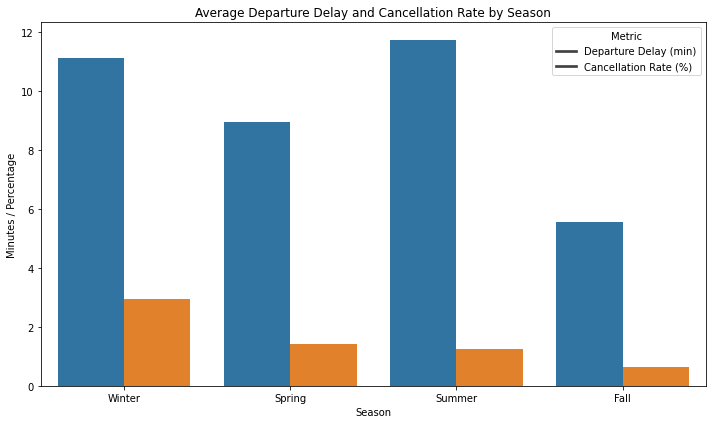

In [19]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

flights['season'] = flights['MONTH'].apply(get_season)

season_stats = flights.groupby('season').agg({
    'DEPARTURE_DELAY': 'mean',
    'CANCELLED': 'mean'
}).reset_index()

season_stats['CANCELLED'] *= 100

season_stats_melted = season_stats.melt(id_vars='season', 
                                        value_vars=['DEPARTURE_DELAY', 'CANCELLED'],
                                        var_name='Metric',
                                        value_name='Value')

season_order = ['Winter', 'Spring', 'Summer', 'Fall']
season_stats_melted['season'] = pd.Categorical(season_stats_melted['season'], categories=season_order, ordered=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=season_stats_melted, x='season', y='Value', hue='Metric')
plt.title('Average Departure Delay and Cancellation Rate by Season')
plt.ylabel('Minutes / Percentage')
plt.xlabel('Season')
plt.legend(title='Metric', labels=['Departure Delay (min)', 'Cancellation Rate (%)'])
plt.tight_layout()
plt.show()

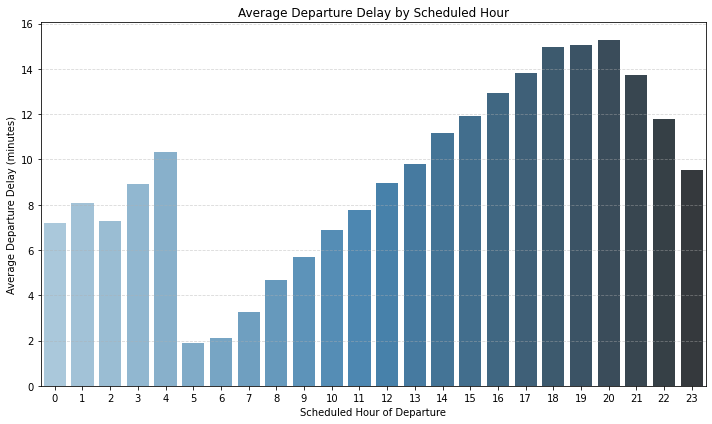

In [20]:
flights['SCHED_HOUR'] = flights['SCHEDULED_DEPARTURE'] // 100

hourly_delay = flights.groupby('SCHED_HOUR')['DEPARTURE_DELAY'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=hourly_delay, x='SCHED_HOUR', y='DEPARTURE_DELAY', palette='Blues_d')
plt.title('Average Departure Delay by Scheduled Hour')
plt.xlabel('Scheduled Hour of Departure')
plt.ylabel('Average Departure Delay (minutes)')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Departure time is so effective in Departure Dealay ...

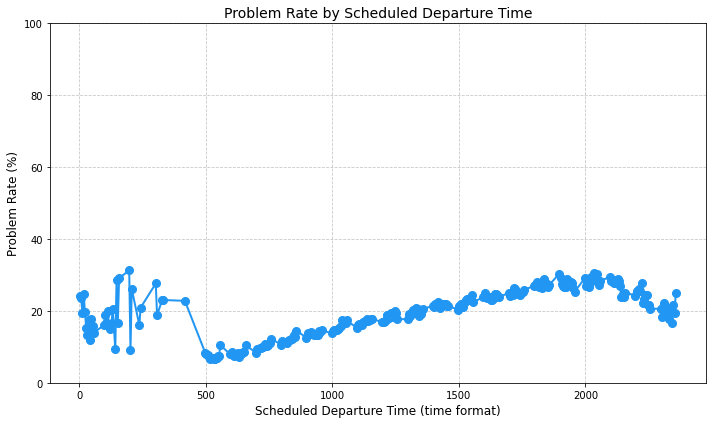

In [21]:
plt.figure(figsize=(10, 6))

bin_size = 5
sched_arrival_bins = range(0, 2500, bin_size)
flights_binned = flights.copy()
flights_binned['SCHED_DEPARTURE_BIN'] = pd.cut(flights['SCHEDULED_DEPARTURE'], bins=sched_arrival_bins)

bin_stats = flights_binned.groupby('SCHED_DEPARTURE_BIN')['TARGET'].agg(['mean', 'count']).reset_index()
bin_stats['mean'] = bin_stats['mean'] * 100
bin_stats = bin_stats[bin_stats['count'] > 100]

bin_midpoints = [(x.left + x.right)/2 for x in bin_stats['SCHED_DEPARTURE_BIN']]

plt.plot(bin_midpoints, bin_stats['mean'], 
         color='#2196F3', linewidth=2, marker='o', markersize=8)

plt.title('Problem Rate by Scheduled Departure Time', fontsize=14)
plt.xlabel('Scheduled Departure Time (time format)', fontsize=12)
plt.ylabel('Problem Rate (%)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

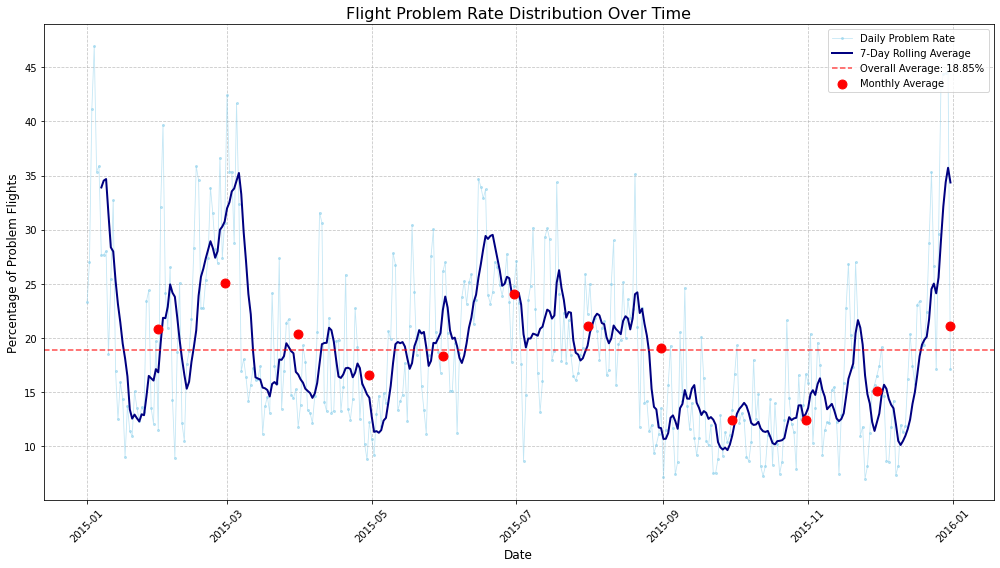

In [22]:
flights['DATE'] = pd.to_datetime(flights[['YEAR', 'MONTH', 'DAY']])

daily_stats = flights.groupby('DATE').agg({
    'FLIGHT_NUMBER': 'count', 
    'TARGET': 'mean'
})
daily_stats.columns = ['Flight_Count', 'Problem_Rate']
daily_stats['Problem_Rate'] = daily_stats['Problem_Rate'] * 100

# Reset index to make DATE a column
daily_stats = daily_stats.reset_index()

# Add a 7-day rolling average to smooth out day-to-day variations
daily_stats['7_Day_Average'] = daily_stats['Problem_Rate'].rolling(window=7).mean()

# Create the visualization
plt.figure(figsize=(14, 8))

# Plot the daily problem rate
plt.plot(daily_stats['DATE'], daily_stats['Problem_Rate'], 
         color='skyblue', alpha=0.5, marker='.', markersize=4, linestyle='-', linewidth=0.8,
         label='Daily Problem Rate')

# Plot the 7-day rolling average
plt.plot(daily_stats['DATE'], daily_stats['7_Day_Average'], 
         color='navy', linewidth=2, linestyle='-', 
         label='7-Day Rolling Average')

# Add overall average line
avg_rate = daily_stats['Problem_Rate'].mean()
plt.axhline(y=avg_rate, color='red', linestyle='--', 
            alpha=0.7, label=f'Overall Average: {avg_rate:.2f}%')

# Add monthly average as points
monthly_stats = daily_stats.set_index('DATE').resample('M').mean()
plt.scatter(monthly_stats.index, monthly_stats['Problem_Rate'], 
            color='red', s=80, zorder=5, label='Monthly Average')

plt.title('Flight Problem Rate Distribution Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Percentage of Problem Flights', fontsize=12)
plt.grid(linestyle='--', alpha=0.7)
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Now we analyze delay reasons and cancellation reason.

we can use different models for each type of delay or cancellation if the pattern is different.

it can increase accuracy if needed.

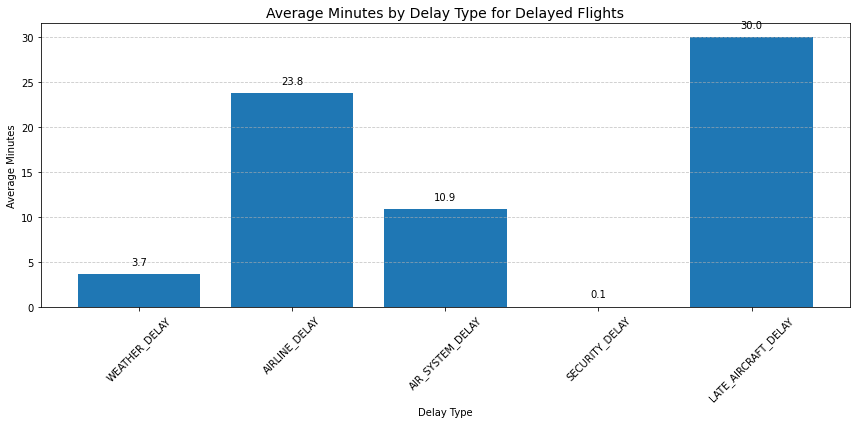

In [23]:
problem_flights = flights[flights['DELAYED'] == 1]
has_delay_info = problem_flights[['WEATHER_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']].notna().any(axis=1)
delay_type_flights = problem_flights[has_delay_info]

delay_types = ['WEATHER_DELAY', 'AIRLINE_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']
delay_means = {delay_type: delay_type_flights[delay_type].dropna().mean() for delay_type in delay_types}
delay_counts = {delay_type: delay_type_flights[delay_type].dropna().count() for delay_type in delay_types}
delay_sum = {delay_type: delay_type_flights[delay_type].dropna().sum() for delay_type in delay_types}

plt.figure(figsize=(12, 6))
plt.bar(delay_means.keys(), delay_means.values())
plt.title('Average Minutes by Delay Type for Delayed Flights', fontsize=14)
plt.xlabel('Delay Type')
plt.ylabel('Average Minutes')
plt.xticks(rotation=45)
for i, (key, value) in enumerate(delay_means.items()):
    plt.text(i, value + 1, f'{value:.1f}', ha='center')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

## DELAY reasons

+ WEATHER_DELAY: Delay caused by bad weather conditions at the origin, destination, or along the flight route.

+ AIRLINE_DELAY: Delay caused by issues related to the airline, such as crew availability, aircraft maintenance, or operational problems.

+ AIR_SYSTEM_DELAY: Delay caused by problems with the national airspace system, including air traffic control delays and traffic congestion.

+ SECURITY_DELAY: Delay caused by security-related issues, including security checks or concerns at the airport.

+ LATE_AIRCRAFT_DELAY: Delay caused by a previous flight of the same aircraft arriving late, affecting the current flight schedule.

LATE_AIRCRAFT_DELAY is more than other Dalays.

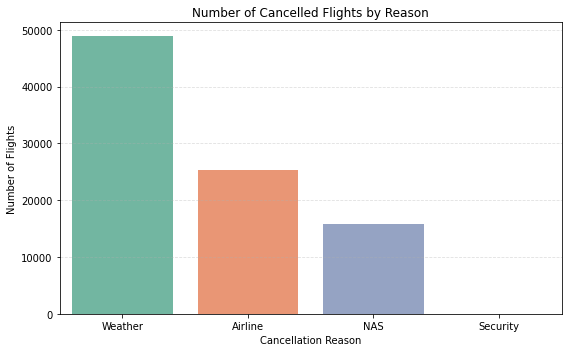

In [24]:
cancelled_flights = flights[flights['CANCELLED'] == 1]

reason_counts = cancelled_flights['CANCELLATION_REASON'].value_counts().rename(index={
    'A': 'Airline',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
}).reset_index()
reason_counts.columns = ['Reason', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=reason_counts, x='Reason', y='Count', palette='Set2')
plt.title('Number of Cancelled Flights by Reason')
plt.xlabel('Cancellation Reason')
plt.ylabel('Number of Flights')
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

NAS stands for National Air System

## cancellation reasons

+ A - Airline/Carrier: Cancellation due to issues from the airline, such as mechanical problems or crew availability.

+ B - Weather: Cancellation caused by severe weather conditions affecting the flight.

+ C - National Air System: Cancellation due to air traffic control or other national airspace system issues.

+ D - Security: Cancellation caused by security concerns or incidents that prevent the flight from operating.

We can see how different kinds of delay can affect the patters.

for example, here we can compare relation of **departure hour** with **weather delay** and **late aircraft delay**:

they are very different. specially about 0:00 A.M to 8:00 A.M

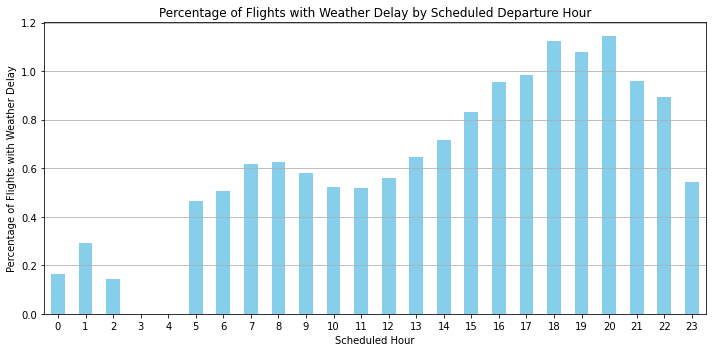

In [25]:
weather_delay_percent = (flights['WEATHER_DELAY'] > 15).groupby(flights['SCHED_HOUR']).mean() * 100

plt.figure(figsize=(10, 5))
weather_delay_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Flights with Weather Delay by Scheduled Departure Hour')
plt.xlabel('Scheduled Hour')
plt.ylabel('Percentage of Flights with Weather Delay')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

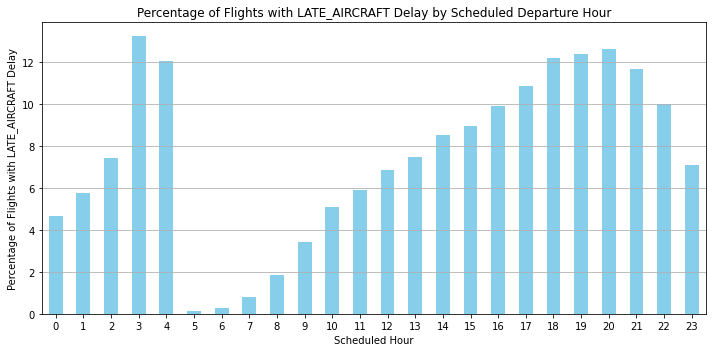

In [26]:
delay_percent = (flights['LATE_AIRCRAFT_DELAY'] > 15).groupby(flights['SCHED_HOUR']).mean() * 100

plt.figure(figsize=(10, 5))
delay_percent.plot(kind='bar', color='skyblue')
plt.title('Percentage of Flights with LATE_AIRCRAFT Delay by Scheduled Departure Hour')
plt.xlabel('Scheduled Hour')
plt.ylabel('Percentage of Flights with LATE_AIRCRAFT Delay')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

we add a column STATUS

it can be **'ontime'**,  **'delayed'**, or **'cancelled'**

In [27]:
def get_status(row):
    if row["CANCELLED"] == 1:
        return "cancelled"
    elif pd.notnull(row["ARRIVAL_DELAY"]) and row["ARRIVAL_DELAY"] > 15:
        return "delayed"
    else:
        return "ontime"

flights["STATUS"] = flights.apply(get_status, axis=1)
print(flights["STATUS"].value_counts())

ontime       4705697
delayed      1023498
cancelled      89884
Name: STATUS, dtype: int64


some columns should be deleted and have no use:

year -> is the same for all flights.

FLIGHT_NUMBER -> it's flight identifier and is irrelevant.

DEPARTURE_TIME, ARRIVAL_TIME -> we don't need it. we can understand delay from arrival delay and adeparture delay. 

TAXI_OUT, WHEELS_OFF, ELAPSED_TIME, AIR_TIME, WHEELS_ON, TAXI_IN, DIVERTED ->

this are future data and we don't have them befor flight. so we shouldn't use them.

TAIL_NUMBER -> has 4898 uniqe value. it can have some little effect but for less complex model we delete it.

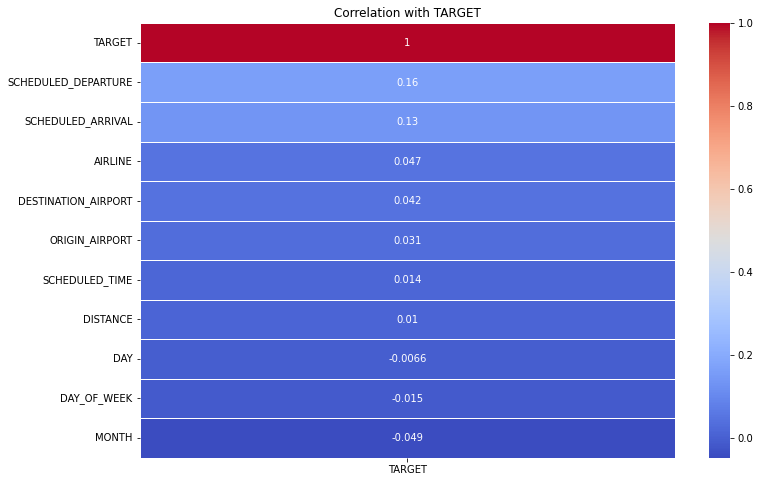

In [28]:
features = ["MONTH", "DAY", "DAY_OF_WEEK", "SCHEDULED_DEPARTURE",
            "AIRLINE", "DISTANCE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "TARGET", "SCHEDULED_TIME", "SCHEDULED_ARRIVAL"]
X2 = flights[features].copy()
categorical = ["AIRLINE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT"]
encoders = {}

for col in categorical:
    X2[col] = X2[col].astype(str) 
    le = LabelEncoder()
    X2[col] = le.fit_transform(X2[col]) 
    encoders[col] = le


# just numerical columns
numeric_cols = X2.select_dtypes(include=['int64', 'float64','int32'])

corr_matrix = numeric_cols.corr()

plt.figure(figsize=(12, 8))

# Cambia 'DEPARTURE_DELAY' por 'TARGET' que es la columna que tienes en tu dataset
sns.heatmap(corr_matrix[['TARGET']].sort_values(by='TARGET', ascending=False),
            annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation with TARGET')
plt.show()

In [29]:
features = ["MONTH", "DAY", "DAY_OF_WEEK", "SCHEDULED_DEPARTURE",
            "AIRLINE", "DISTANCE", "ORIGIN_AIRPORT", "DESTINATION_AIRPORT", "SCHEDULED_TIME", "SCHEDULED_ARRIVAL", "TARGET"]
flights_filtered = flights[features].copy()

le = LabelEncoder()
for col in ['AIRLINE', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT']:
    flights_filtered[col] = le.fit_transform(flights_filtered[col].astype(str))

flights_filtered = flights_filtered.sort_values(by=['MONTH', 'DAY', 'SCHEDULED_DEPARTURE']).reset_index(drop=True)


flights_filtered.head(10)

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,AIRLINE,DISTANCE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,SCHEDULED_ARRIVAL,TARGET
0,1,1,4,5,1,1448,323,584,205.0,430,0
1,1,1,4,10,0,2330,482,542,280.0,750,0
2,1,1,4,20,11,2296,584,373,286.0,806,0
3,1,1,4,20,0,2342,482,510,285.0,805,0
4,1,1,4,25,1,1448,583,324,235.0,320,0
5,1,1,4,25,3,1589,584,523,217.0,602,0
6,1,1,4,25,8,1299,480,523,181.0,526,0
7,1,1,4,30,11,2125,482,373,273.0,803,0
8,1,1,4,30,0,1464,584,393,195.0,545,0
9,1,1,4,30,3,1747,480,327,221.0,711,0


In [30]:
print("\nMissing values analysis")
missing_values = flights_filtered.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_values / len(flights_filtered) * 100).round(2)
missing_clean_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_pct})
missing_clean_data = missing_clean_data[missing_clean_data['Missing Values'] > 0]
missing_clean_data


Missing values analysis


,Missing Values,Percentage (%)
SCHEDULED_TIME,6,0.0


In [31]:
flights_filtered = flights_filtered.dropna(subset=['SCHEDULED_TIME'])

In [32]:
print("\nMissing values analysis")
missing_values = flights_filtered.isnull().sum().sort_values(ascending=False)
missing_pct = (missing_values / len(flights_filtered) * 100).round(2)
missing_clean_dataean_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_pct})
missing_clean_dataean_data = missing_clean_dataean_data[missing_clean_dataean_data['Missing Values'] > 0]
missing_clean_dataean_data


Missing values analysis


,Missing Values,Percentage (%)


In [33]:
flights_filtered["TARGET"].value_counts()

0    4712659
1    1106414
Name: TARGET, dtype: int64

In [34]:
original_class_ratio = flights_filtered['TARGET'].mean()
print(f"Original ratio of class 1: {original_class_ratio:.4f} ({original_class_ratio*100:.2f}%)")

Original ratio of class 1: 0.1901 (19.01%)


In [35]:
bfr_size = len(flights_filtered)

In [36]:
flights_filtered = flights_filtered.drop_duplicates().reset_index(drop=True)

In [37]:
aftr_size = len(flights_filtered)
bfr_size- aftr_size

172

Decision Trees do not require feature normalization or scaling, as they are invariant to the range of feature values.

------------

I used 5 different configurations of simple decision trees to arrive at the Decision Tree (Tuned). Additionally, the GradientBoostingClassifier did not perform very well, but the RandomForestClassifier performed exceptionally well. I selected these two as the final models, and you can see them (Because if I wanted to run all of them every time, it would be very time-consuming!)

In [38]:
flights_filtered

,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,AIRLINE,DISTANCE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,SCHEDULED_ARRIVAL,TARGET
0,1,1,4,5,1,1448,323,584,205.0,430,0
1,1,1,4,10,0,2330,482,542,280.0,750,0
2,1,1,4,20,11,2296,584,373,286.0,806,0
3,1,1,4,20,0,2342,482,510,285.0,805,0
4,1,1,4,25,1,1448,583,324,235.0,320,0
...,...,...,...,...,...,...,...,...,...,...,...
5818896,12,31,4,2359,2,2611,482,346,320.0,819,0
5818897,12,31,4,2359,2,1617,472,555,227.0,446,0
5818898,12,31,4,2359,2,1598,472,592,221.0,440,0
5818899,12,31,4,2359,2,1189,499,592,161.0,340,0


In [39]:
total_rows = len(flights_filtered)
split_point = int(total_rows * 0.8)  

In [40]:
X_train = flights_filtered.iloc[:split_point, :-1]
X_test = flights_filtered.iloc[split_point:, :-1]
y_train = flights_filtered.iloc[:split_point, -1]
y_test = flights_filtered.iloc[split_point:, -1]

In [41]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (4655120, 10)
Testing set size: (1163781, 10)


In [ ]:
models = {
    'Decision Tree (Tuned)': DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=30,
        min_samples_leaf=15,
        class_weight='balanced',
        criterion='entropy',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=42
    )
}

In [42]:
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\nTop 10 Feature Importances:")
        print(feature_importances.head(10))


----- Decision Tree (Tuned) -----
Accuracy: 0.7580
Precision: 0.2127
Recall: 0.1466
F1 Score: 0.1736
ROC AUC: 0.5164
Confusion Matrix:
[[852585 109484]
 [172138  29574]]

Top 10 Feature Importances:
               Feature  Importance
3  SCHEDULED_DEPARTURE    0.533065
0                MONTH    0.176307
4              AIRLINE    0.150678
1                  DAY    0.057750
2          DAY_OF_WEEK    0.028425
9    SCHEDULED_ARRIVAL    0.021886
6       ORIGIN_AIRPORT    0.018625
5             DISTANCE    0.005789
7  DESTINATION_AIRPORT    0.004330
8       SCHEDULED_TIME    0.003147

----- Random Forest -----
Accuracy: 0.7882
Precision: 0.2318
Recall: 0.0959
F1 Score: 0.1357
ROC AUC: 0.5146
Confusion Matrix:
[[897924  64145]
 [182361  19351]]

Top 10 Feature Importances:
               Feature  Importance
3  SCHEDULED_DEPARTURE    0.323513
9    SCHEDULED_ARRIVAL    0.248493
0                MONTH    0.142995
4              AIRLINE    0.111617
1                  DAY    0.052891
6       ORIGI

---------------

# MLP

In [42]:
scaler = StandardScaler()          
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [43]:
model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=7, random_state=42)

In [44]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=7, random_state=42)

In [45]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [46]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8266
Precision: 0.2476
Recall: 0.0001
F1 Score: 0.0003
ROC AUC: 0.5000
Confusion Matrix:
[[961990     79]
 [201686     26]]


-------------

# KNN

In [47]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [48]:
print("\nKNN Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



KNN Model Metrics:
Accuracy: 0.8069
Precision: 0.2229
Recall: 0.0459
F1 Score: 0.0761
ROC AUC: 0.5062
Confusion Matrix:
[[929797  32272]
 [192454   9258]]


# Naive Bayes (Complement, for imbalance data)

In [42]:
model = ComplementNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [43]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy:  0.5136
Precision: 0.1964
Recall:    0.5841
F1 Score:  0.2939
ROC AUC:   0.5415
Confusion Matrix:
[[479930 482139]
 [ 83890 117822]]


## removing outlier

In [43]:
df = flights_filtered # temp variable 

target_counts = df['TARGET'].value_counts()

print("Flight Delay Distribution:")
print(f"Non-delayed flights (TARGET = 0): {target_counts.get(0, 0)} ({target_counts.get(0, 0)/len(df)*100:.2f}%)")
print(f"Delayed flights (TARGET = 1): {target_counts.get(1, 0)} ({target_counts.get(1, 0)/len(df)*100:.2f}%)")
print(f"Total flights: {len(df)}")

Flight Delay Distribution:
Non-delayed flights (TARGET = 0): 4712494 (80.99%)
Delayed flights (TARGET = 1): 1106407 (19.01%)
Total flights: 5818901


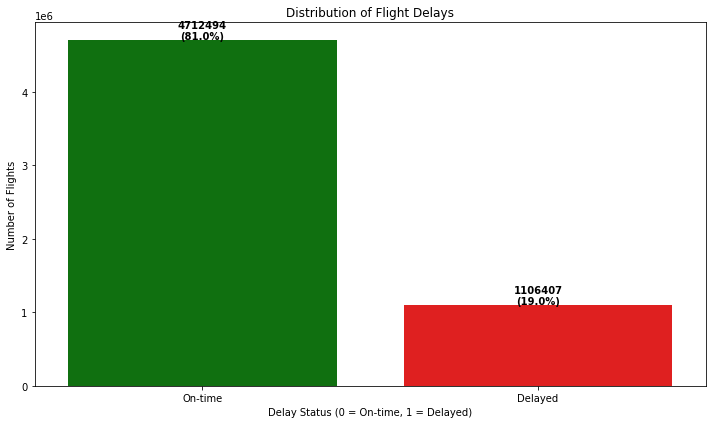

In [44]:
plt.figure(figsize=(10, 6))
sns.countplot(x='TARGET', data=df, palette=['green', 'red'])
plt.title('Distribution of Flight Delays')
plt.xlabel('Delay Status (0 = On-time, 1 = Delayed)')
plt.ylabel('Number of Flights')
plt.xticks([0, 1], ['On-time', 'Delayed'])

# Add count labels on top of each bar
for i, count in enumerate(target_counts):
    plt.text(i, count + 100, f"{count}\n({count/len(df)*100:.1f}%)", 
             ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('target_distribution.png')
plt.show()

In [45]:
# select some continuous numerical columns suitable for IQR method
# exclude TARGET (binary) and categorical columns like MONTH, DAY, DAY_OF_WEEK, AIRLINE

continuous_columns = ['DISTANCE', 'SCHEDULED_TIME', 'SCHEDULED_ARRIVAL', 'SCHEDULED_DEPARTURE']

# detect outliers using IQR method
def detect_outliers_iqr(df, columns):
    outliers_dict = {}
    all_outliers = set()
    
    for col in columns:
        # Calculate quartiles
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outlier_indices = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        
        # Store outliers for this column
        outliers_dict[col] = outlier_indices
        all_outliers.update(outlier_indices)
        
        print(f"Column {col}:")
        print(f"  - Q1: {Q1}")
        print(f"  - Q3: {Q3}")
        print(f"  - IQR: {IQR}")
        print(f"  - Lower bound: {lower_bound}")
        print(f"  - Upper bound: {upper_bound}")
        print(f"  - Number of outliers: {len(outlier_indices)}")
    
    return outliers_dict, all_outliers

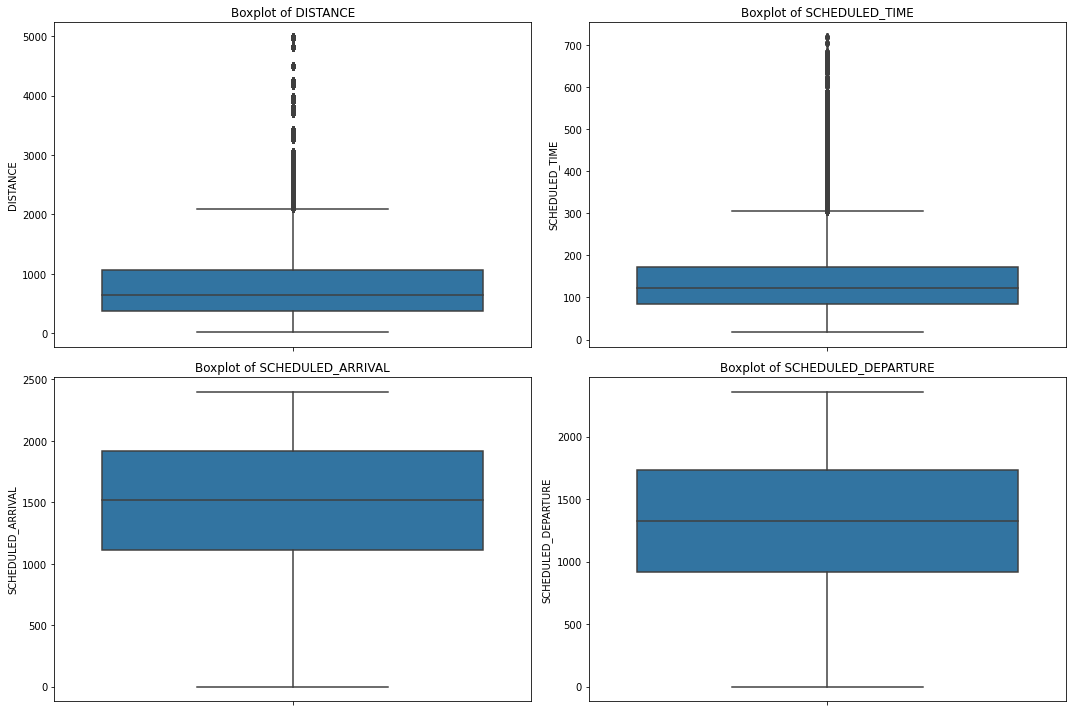

In [46]:
# distributions before outlier detection
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.savefig('before_outlier_removal.png')
plt.show()

In [47]:
outliers_by_column, all_outliers = detect_outliers_iqr(df, continuous_columns)

print(f"\nTotal unique outliers across all columns: {len(all_outliers)}")
print(f"Percentage of outliers: {(len(all_outliers) / len(df)) * 100:.2f}%")

Column DISTANCE:
  - Q1: 373.0
  - Q3: 1062.0
  - IQR: 689.0
  - Lower bound: -660.5
  - Upper bound: 2095.5
  - Number of outliers: 349509
Column SCHEDULED_TIME:
  - Q1: 85.0
  - Q3: 173.0
  - IQR: 88.0
  - Lower bound: -47.0
  - Upper bound: 305.0
  - Number of outliers: 299008
Column SCHEDULED_ARRIVAL:
  - Q1: 1110.0
  - Q3: 1918.0
  - IQR: 808.0
  - Lower bound: -102.0
  - Upper bound: 3130.0
  - Number of outliers: 0
Column SCHEDULED_DEPARTURE:
  - Q1: 917.0
  - Q3: 1730.0
  - IQR: 813.0
  - Lower bound: -302.5
  - Upper bound: 2949.5
  - Number of outliers: 0

Total unique outliers across all columns: 366491
Percentage of outliers: 6.30%


In [48]:
outliers_df = df.loc[list(all_outliers)]
outlier_target_counts = outliers_df['TARGET'].value_counts()

print("\nOutlier Distribution by Delay Status:")
print(f"Non-delayed flights with outliers: {outlier_target_counts.get(0, 0)} ({outlier_target_counts.get(0, 0)/len(outliers_df)*100:.2f}% of outliers)")
print(f"Delayed flights with outliers: {outlier_target_counts.get(1, 0)} ({outlier_target_counts.get(1, 0)/len(outliers_df)*100:.2f}% of outliers)")


Outlier Distribution by Delay Status:
Non-delayed flights with outliers: 298689 (81.50% of outliers)
Delayed flights with outliers: 67802 (18.50% of outliers)


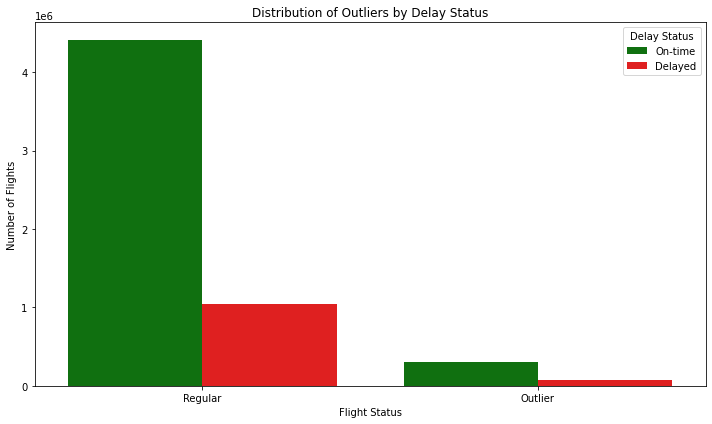

In [49]:
# outlier distribution vs TARGET

plt.figure(figsize=(10, 6))
outlier_status = ['Regular', 'Outlier']
outlier_counts = [len(df) - len(all_outliers), len(all_outliers)]

plot_df = pd.DataFrame({
    'status': ['Regular'] * (len(df) - len(all_outliers)) + ['Outlier'] * len(all_outliers),
    'target': list(df.drop(index=list(all_outliers))['TARGET']) + list(outliers_df['TARGET'])
})

sns.countplot(x='status', hue='target', data=plot_df, palette=['green', 'red'])
plt.title('Distribution of Outliers by Delay Status')
plt.xlabel('Flight Status')
plt.ylabel('Number of Flights')
plt.legend(title='Delay Status', labels=['On-time', 'Delayed'])
plt.tight_layout()
plt.savefig('outlier_by_target.png')
plt.show()

In [50]:
# remove outliers
df_cleaned = df.drop(index=list(all_outliers))
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(df_cleaned)}")
print(f"Removed {len(all_outliers)} rows")

Original dataset size: 5818901
Cleaned dataset size: 5452410
Removed 366491 rows


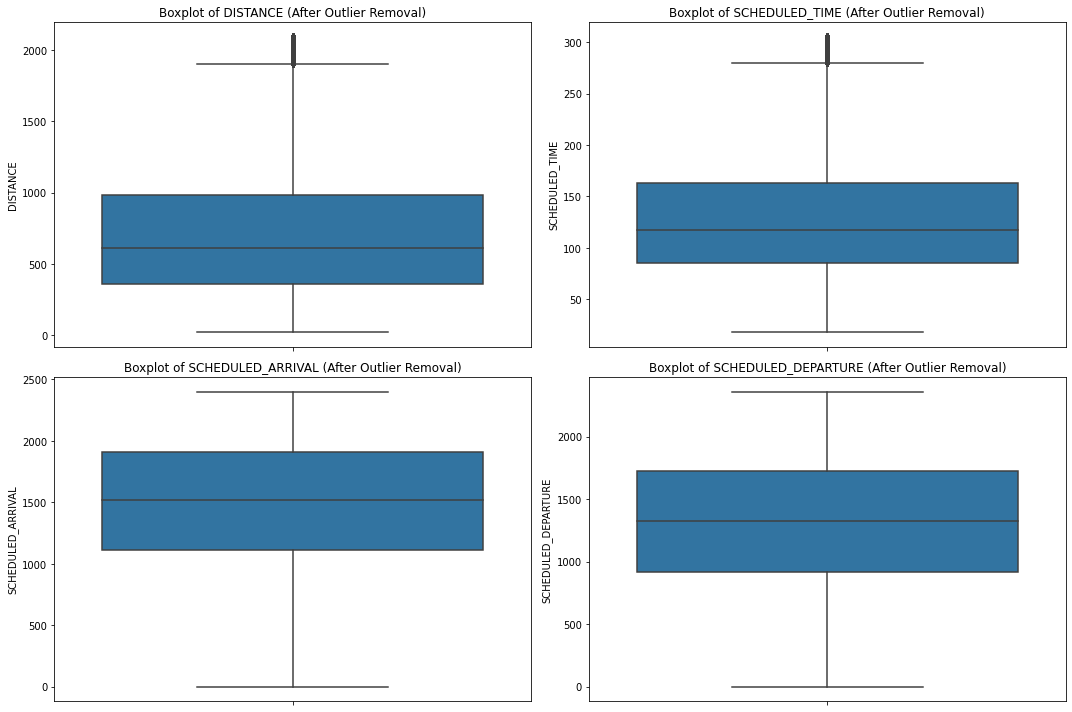

In [51]:
# distributions after outlier removal
plt.figure(figsize=(15, 10))
for i, col in enumerate(continuous_columns):
    plt.subplot(2, 2, i+1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f'Boxplot of {col} (After Outlier Removal)')
plt.tight_layout()
plt.savefig('after_outlier_removal.png')
plt.show()

In [52]:
cleaned_target_counts = df_cleaned['TARGET'].value_counts()
print("\nFlight Delay Distribution After Cleaning:")
print(f"Non-delayed flights (TARGET = 0): {cleaned_target_counts.get(0, 0)} ({cleaned_target_counts.get(0, 0)/len(df_cleaned)*100:.2f}%)")
print(f"Delayed flights (TARGET = 1): {cleaned_target_counts.get(1, 0)} ({cleaned_target_counts.get(1, 0)/len(df_cleaned)*100:.2f}%)")

original_ratio = target_counts.get(0, 0) / target_counts.get(1, 0) if target_counts.get(1, 0) > 0 else float('inf')
cleaned_ratio = cleaned_target_counts.get(0, 0) / cleaned_target_counts.get(1, 0) if cleaned_target_counts.get(1, 0) > 0 else float('inf')

print(f"\nClass imbalance before cleaning (Non-delayed:Delayed): {original_ratio:.2f}:1")
print(f"Class imbalance after cleaning (Non-delayed:Delayed): {cleaned_ratio:.2f}:1")


Flight Delay Distribution After Cleaning:
Non-delayed flights (TARGET = 0): 4413805 (80.95%)
Delayed flights (TARGET = 1): 1038605 (19.05%)

Class imbalance before cleaning (Non-delayed:Delayed): 4.26:1
Class imbalance after cleaning (Non-delayed:Delayed): 4.25:1


In [53]:
flights_filtered_cleaned = df_cleaned

In [54]:
flights_filtered_cleaned["TARGET"].value_counts()

0    4413805
1    1038605
Name: TARGET, dtype: int64

In [55]:
flights_filtered_cleaned = flights_filtered_cleaned.sort_values(by=['MONTH', 'DAY', 'SCHEDULED_DEPARTURE']).reset_index(drop=True)
flights_filtered_cleaned


,MONTH,DAY,DAY_OF_WEEK,SCHEDULED_DEPARTURE,AIRLINE,DISTANCE,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_TIME,SCHEDULED_ARRIVAL,TARGET
0,1,1,4,5,1,1448,323,584,205.0,430,0
1,1,1,4,25,1,1448,583,324,235.0,320,0
2,1,1,4,25,3,1589,584,523,217.0,602,0
3,1,1,4,25,8,1299,480,523,181.0,526,0
4,1,1,4,30,0,1464,584,393,195.0,545,0
...,...,...,...,...,...,...,...,...,...,...,...
5452405,12,31,4,2359,2,1826,308,473,227.0,546,1
5452406,12,31,4,2359,2,1617,472,555,227.0,446,0
5452407,12,31,4,2359,2,1598,472,592,221.0,440,0
5452408,12,31,4,2359,2,1189,499,592,161.0,340,0


In [56]:
original_class_ratio = flights_filtered_cleaned['TARGET'].mean()
print(f"Original ratio of class 1: {original_class_ratio:.4f} ({original_class_ratio*100:.2f}%)")

Original ratio of class 1: 0.1905 (19.05%)


In [57]:
total_rows = len(flights_filtered_cleaned)
split_point = int(total_rows * 0.8) 

In [58]:
X_train = flights_filtered_cleaned.iloc[:split_point, :-1]
X_test = flights_filtered_cleaned.iloc[split_point:, :-1]
y_train = flights_filtered_cleaned.iloc[:split_point, -1]
y_test = flights_filtered_cleaned.iloc[split_point:, -1]

In [59]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (4361928, 10)
Testing set size: (1090482, 10)


In [66]:
models = {
    'Decision Tree (Tuned)': DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=30,
        min_samples_leaf=15,
        class_weight='balanced',
        criterion='entropy',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=42
    )
}

In [60]:
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\nTop 10 Feature Importances:")
        print(feature_importances.head(10))


----- Decision Tree (Tuned) -----
Accuracy: 0.7544
Precision: 0.2269
Recall: 0.1721
F1 Score: 0.1958
ROC AUC: 0.5244
Confusion Matrix:
[[790044 111042]
 [156799  32597]]

Top 10 Feature Importances:
               Feature  Importance
3  SCHEDULED_DEPARTURE    0.535707
0                MONTH    0.175543
4              AIRLINE    0.129454
1                  DAY    0.077134
2          DAY_OF_WEEK    0.027224
6       ORIGIN_AIRPORT    0.022606
8       SCHEDULED_TIME    0.012256
9    SCHEDULED_ARRIVAL    0.009899
7  DESTINATION_AIRPORT    0.005873
5             DISTANCE    0.004305

----- Random Forest -----
Accuracy: 0.7886
Precision: 0.2307
Recall: 0.0932
F1 Score: 0.1327
ROC AUC: 0.5139
Confusion Matrix:
[[842257  58829]
 [171752  17644]]

Top 10 Feature Importances:
               Feature  Importance
3  SCHEDULED_DEPARTURE    0.304952
9    SCHEDULED_ARRIVAL    0.269250
0                MONTH    0.143544
4              AIRLINE    0.104923
1                  DAY    0.052972
6       ORIGI

#### As expected, the F1 score is a better metric than accuracy in this scenario. Consider a hypothetical confusion matrix where only the first column has values (true negatives and false negatives), and the second column (true positives and false positives) is entirely zeros. In this case, accuracy could still reach around 80% due to the imbalanced nature of the dataset, but precision, recall, and consequently the F1 score would all be zero. This highlights why F1 is more appropriate here—it balances precision and recall, providing a more meaningful evaluation of the model's performance on imbalanced data.



### As can be seen, the result in the optimized model increases from 17.36% to 19.58% by removing outlier data

# MLP

In [60]:
scaler = StandardScaler()          
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [61]:
model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=7, random_state=42)

In [62]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=7, random_state=42)

In [63]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [64]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8263
Precision: 1.0000
Recall: 0.0000
F1 Score: 0.0000
ROC AUC: 0.5000
Confusion Matrix:
[[901086      0]
 [189395      1]]


---------------

# KNN

In [65]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [66]:
print("\nKNN Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))


KNN Model Metrics:
Accuracy: 0.8065
Precision: 0.2220
Recall: 0.0456
F1 Score: 0.0757
ROC AUC: 0.5060
Confusion Matrix:
[[870818  30268]
 [180759   8637]]


#  Naive Bayes (Complement, for imbalance data)

In [ ]:
model = ComplementNB()
model.fit(X_train, y_train)

In [67]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

## Oversampleing Method

In [67]:
df = flights_filtered.sort_values(by=['MONTH', 'DAY']) 

# Time-based split: 80% older data for training, 20% newer data for testing
train_size = int(len(df) * 0.8)
train_data = df.iloc[:train_size]
test_data = df.iloc[train_size:]

In [68]:
def oversample_minority(df, target_col='TARGET', balance_ratio=0.5):

    class_counts = df[target_col].value_counts()
    majority_class = class_counts.idxmax()
    minority_class = class_counts.idxmin()
    
    # number of minority samples we need
    n_majority = class_counts[majority_class]
    n_minority = class_counts[minority_class]
    n_to_add = int(n_majority * balance_ratio) - n_minority
    
    # if samples enough, return original
    if n_to_add <= 0:
        return df
    
    # Get minority samples
    minority_samples = df[df[target_col] == minority_class]
    
    # Oversample with replacement
    oversampled_minority = minority_samples.sample(n=n_to_add, replace=True, random_state=42)
    
    # Combine with original data
    result_df = pd.concat([df, oversampled_minority])
    
    return result_df

In [69]:
def stratified_temporal_oversampling(df, target_col='TARGET', time_col='MONTH', balance_ratio=0.5):
    result_df = df.copy()
    
    # loop on each time period separately
    for time_period in df[time_col].unique():
        # data for this time period
        period_df = df[df[time_col] == time_period]
        
        # class counts for this period
        class_counts = period_df[target_col].value_counts()
        
        # if one class is missing in this period
        if len(class_counts) < 2:
            continue
            
        majority_class = class_counts.idxmax()
        minority_class = class_counts.idxmin()
        n_majority = class_counts[majority_class]
        n_minority = class_counts[minority_class]
        
        # number of minority samples we need
        n_to_add = int(n_majority * balance_ratio) - n_minority
        
        # if already have enough samples, continue
        if n_to_add <= 0:
            continue
        
        # minority samples for this period
        period_minority = period_df[period_df[target_col] == minority_class]
        
        # oversample with replacement
        oversampled_minority = period_minority.sample(n=n_to_add, replace=True, random_state=42)
        result_df = pd.concat([result_df, oversampled_minority])
    
    return result_df

In [80]:
balanced_train = stratified_temporal_oversampling(train_data, balance_ratio=0.5)

print("After oversampling:")
print("Total samples:", len(balanced_train))
print("Class distribution:", balanced_train['TARGET'].value_counts())
print(f"New ratio: 1:{balanced_train['TARGET'].value_counts()[0] / balanced_train['TARGET'].value_counts()[1]:.2f}")

After oversampling:
Total samples: 5625634
Class distribution: 0    3750425
1    1875209
Name: TARGET, dtype: int64
New ratio: 1:2.00


In [81]:
total_rows = len(balanced_train)
split_point = int(total_rows * 0.8)  

In [92]:
X_train = balanced_train.iloc[:, :-1]
X_test = test_data.iloc[:, :-1]                 # it is very important point
y_train = balanced_train.iloc[:, -1]
y_test = test_data.iloc[:, -1]

In [83]:
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (5625634, 10)
Testing set size: (1163781, 10)


In [84]:
models = {
    'Decision Tree (Tuned)': DecisionTreeClassifier(
        max_depth=8,
        min_samples_split=30,
        min_samples_leaf=15,
        class_weight='balanced',
        criterion='entropy',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        min_samples_split=20,
        min_samples_leaf=10,
        class_weight='balanced',
        random_state=42
    )
}

In [85]:
for model_name, model in models.items():
    print(f"\n----- {model_name} -----")
    
    # Train model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    # Print metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC: {roc_auc:.4f}")
    
    # Print confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)
    
    # Feature importance for tree-based models
    if hasattr(model, 'feature_importances_'):
        feature_importances = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\nTop 10 Feature Importances:")
        print(feature_importances.head(10))


----- Decision Tree (Tuned) -----
Accuracy: 0.5675
Precision: 0.2228
Recall: 0.6007
F1 Score: 0.3250
ROC AUC: 0.5806
Confusion Matrix:
[[539275 422794]
 [ 80543 121169]]

Top 10 Feature Importances:
               Feature  Importance
3  SCHEDULED_DEPARTURE    0.636251
4              AIRLINE    0.157117
1                  DAY    0.060434
0                MONTH    0.049089
6       ORIGIN_AIRPORT    0.025206
8       SCHEDULED_TIME    0.021782
9    SCHEDULED_ARRIVAL    0.020116
5             DISTANCE    0.010569
2          DAY_OF_WEEK    0.009859
7  DESTINATION_AIRPORT    0.009577

----- Random Forest -----
Accuracy: 0.5777
Precision: 0.2280
Recall: 0.6023
F1 Score: 0.3308
ROC AUC: 0.5874
Confusion Matrix:
[[550778 411291]
 [ 80211 121501]]

Top 10 Feature Importances:
               Feature  Importance
3  SCHEDULED_DEPARTURE    0.395342
9    SCHEDULED_ARRIVAL    0.264745
4              AIRLINE    0.126247
1                  DAY    0.049206
0                MONTH    0.049055
6       ORIGI

---------

# MLP

In [ ]:
scaler = StandardScaler()          
X_train = scaler.fit_transform(X_train)
X_test  = scaler.transform(X_test)

In [75]:
model = MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=7, random_state=42)

In [ ]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100, 100), max_iter=7, random_state=42)

In [91]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [78]:
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.7313
Precision: 0.2228
Recall: 0.2212
F1 Score: 0.2220
ROC AUC: 0.5297
Confusion Matrix:
[[806405 155664]
 [157090  44622]]


# KNN

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

In [80]:
print("\nKNN Model Metrics:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_knn):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_knn):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_knn):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_knn):.4f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_knn):.4f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))



KNN Model Metrics:
Accuracy: 0.6858
Precision: 0.2009
Recall: 0.2728
F1 Score: 0.2314
ROC AUC: 0.5226
Confusion Matrix:
[[743122 218947]
 [146681  55031]]


# Naive Bayes (Complement, for imbalance data)

In [ ]:
model = ComplementNB()
model.fit(X_train, y_train)

ComplementNB()

In [100]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [101]:
print(f"Accuracy:  {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"ROC AUC:   {roc_auc:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


Accuracy:  0.5166
Precision: 0.1968
Recall:    0.5809
F1 Score:  0.2940
ROC AUC:   0.5420
Confusion Matrix:
[[483996 478073]
 [ 84547 117165]]


# Soft Classification

#### Converting the 0/1 target to a continuous probability transforms the task from a binary decision into a calibrated risk score, enabling dynamic thresholding, smarter resource allocation, and flexible alerting without retraining the model.


In [ ]:
reg = DecisionTreeRegressor(
        max_depth=6,          
        min_samples_leaf=100,  
        random_state=42
)
reg.fit(X_train, y_train)

y_proba = reg.predict(X_test)
print("ROC-AUC :", roc_auc_score(y_test, y_proba))

ROC-AUC : 0.6664052993287236


#### Regression is better because it outputs a continuous probability instead of a fixed 0/1 label, allowing dynamic thresholding, multi-level alerts, and risk-based prioritization—so operational decisions can adapt to real-world costs without retraining the model.

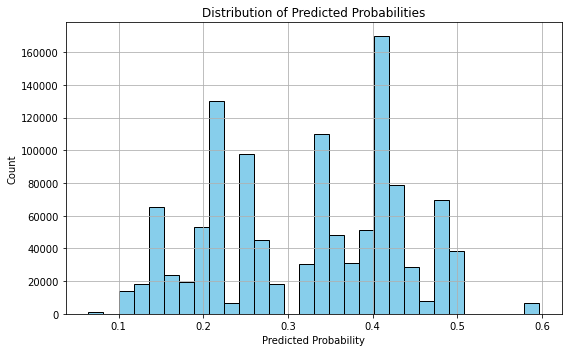

In [ ]:
plt.figure(figsize=(8, 5))
plt.hist(y_proba, bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Predicted Probabilities")
plt.xlabel("Predicted Probability")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()
